In [ ]:
#libraries
!pip install pydrive
!pip install GoogleCredential
!pip install auth
#!pip install -q time
#!pip install -q glob
!pip install -q keras
!pip install -q IPython
!pip install -q matplotlib
!pip install -q numpy
!pip install -q pandas
!pip install -q plotly
!pip install -q tensorflow
!pip install -q seaborn
!pip install -q scikit-learn
!pip install tqdm
!pip install -q os-sys
!pip install -q librosa
!pip install -q resampy
!pip install -q sounddevice
!apt-get install -y portaudio19-dev
!pip install sounddevice

ERROR: Could not find a version that satisfies the requirement GoogleCredential (from versions: none)
ERROR: No matching distribution found for GoogleCredential
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.2/363.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error o

In [ ]:
import os
import random
import sys
import time
import pandas as pd
import numpy as np
np.complex = complex
import librosa
from scipy import signal
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from tqdm import tqdm
from google.colab import drive
import seaborn as sns
import sounddevice as sd
from IPython.display import Audio
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Importing the main Dataset with Depression Score

In [ ]:
data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data-preparation2/the_main_depression.csv')

Printing the size

In [ ]:
depression_counts = data_df['depression_level'].value_counts()
depression_counts

,count
depression_level,
0,322
7,59
2,52
10,47
4,42
1,40
3,34
11,31
16,21


In [ ]:
first_20_zero_rows = data_df[data_df['depression_level'] == 0].iloc[:20]
non_zero_rows = data_df[data_df['depression_level'] != 0]
data_df = pd.concat([first_20_zero_rows, non_zero_rows], axis=0).reset_index(drop=True)

In [ ]:
depression_counts = data_df['depression_level'].value_counts()
depression_counts

,count
depression_level,
7,59
2,52
10,47
4,42
1,40
3,34
11,31
12,21
16,21


In [ ]:
def categorize_depression_level(value):
    if 0 <= value <= 7:
        return 'low'
    elif 8 <= value <= 16:
        return 'med'
    elif 17 <= value <= 23:
        return 'high'
    else:
        return 'unknown'

data_df['depression_level'] = data_df['depression_level'].apply(categorize_depression_level)

In [ ]:
depression_counts = data_df['depression_level'].value_counts()
depression_counts

,count
depression_level,
low,285
med,178
high,42


In [ ]:
low = data_df[data_df['depression_level'] == 'low']
med = data_df[data_df['depression_level'] == 'med']
high =data_df[data_df['depression_level'] == 'high']

In [ ]:
print(f"Low :{len(low)} med :{len(med)}  High:{len(high)} ")

Low :285 med :178  High:42 


In [ ]:
from sklearn.utils import resample
target_size = min(len(low), len(med), len(high))

# Option 1: Downsample larger classes
low_balanced = resample(low, replace=False, n_samples=target_size, random_state=42)
med_balanced = resample(med, replace=False, n_samples=target_size, random_state=42)
high_balanced = resample(high, replace=False, n_samples=target_size, random_state=42)

In [ ]:
balanced_df = pd.concat([low_balanced, med_balanced, high_balanced])

# Shuffle the resulting dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the balanced dataset
print(balanced_df)

      id                                          file_path depression_level
0    418  /content/drive/MyDrive/Colab Notebooks/Data-pr...              med
1    307  /content/drive/MyDrive/Colab Notebooks/Data-pr...              low
2    426  /content/drive/MyDrive/Colab Notebooks/Data-pr...             high
3    483  /content/drive/MyDrive/Colab Notebooks/Data-pr...              med
4    440  /content/drive/MyDrive/Colab Notebooks/Data-pr...             high
..   ...                                                ...              ...
121  362  /content/drive/MyDrive/Colab Notebooks/Data-pr...             high
122  303  /content/drive/MyDrive/Colab Notebooks/Data-pr...              low
123  440  /content/drive/MyDrive/Colab Notebooks/Data-pr...             high
124  433  /content/drive/MyDrive/Colab Notebooks/Data-pr...              med
125  448  /content/drive/MyDrive/Colab Notebooks/Data-pr...             high

[126 rows x 3 columns]


In [ ]:
len(balanced_df)

126

These are the Data Noise addition and pitch detection code taken from  https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html

In [ ]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()


def noise(data):
    """
    Adding White Noise.
    """
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data

def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*500)
    return np.roll(data, s_range)

def stretch(data, rate=0.8):
    """
    Streching the Sound.
    """
    data = librosa.effects.time_stretch(data, rate)
    return data

def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """

    bins_per_octave = 12
    pitch_pm=2
    pitch_change =  pitch_pm * 2*(np.random.uniform())
    data = librosa.effects.pitch_shift(data.astype('float64'),
                                      sr=sample_rate, n_steps=pitch_change,
                                      bins_per_octave=bins_per_octave)
    return data

def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=1.5,high=3)
    return (data * dyn_change)

def speedNpitch(data):
    """
    peed and Pitch Tuning.
    """
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.0  / length_change
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data


In [ ]:
data_df=balanced_df

In [ ]:
input_duration=120


MFCC Feature extraction and data preparation

In [ ]:
data = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data_df))):
    X, sample_rate = librosa.load(data_df.file_path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=20), axis=0)
    feature = mfccs
    data.loc[i] = [feature]

100%|██████████| 126/126 [04:26<00:00,  2.12s/it]


In [ ]:
data.head()

,feature
0,"[-13.189194, -14.8270855, -19.176355, -20.2673..."
1,"[-8.973366, -6.585533, -6.111044, -6.25764, -5..."
2,"[-21.397238, -22.266882, -24.020988, -24.93363..."
3,"[-22.641167, -20.802635, -22.193804, -22.23945..."
4,"[-18.008854, -18.613995, -19.296898, -19.16490..."


In [ ]:
df3 = pd.DataFrame(data['feature'].values.tolist())
labels = data_df.depression_level

In [ ]:
newdf = pd.concat([df3,labels], axis=1)

In [ ]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})
len(rnewdf)

126

In [ ]:
rnewdf = rnewdf.fillna(0)
rnewdf.head()

,0,1,2,3,4,5,6,7,8,9,...,10284,10285,10286,10287,10288,10289,10290,10291,10292,depression_level
0,-13.189194,-14.827085,-19.176355,-20.267344,-19.694309,-18.302612,-17.529549,-16.994490,-15.546984,-16.303915,...,-35.757324,-35.757324,-35.757324,-35.757324,-35.757324,-35.757324,-35.757324,-35.757324,-35.757324,med
1,-8.973366,-6.585533,-6.111044,-6.257640,-5.192345,-4.424926,-5.315576,-4.217028,-4.774751,-4.991864,...,-8.449880,-6.293352,-5.113872,-5.962782,-7.051817,-7.681726,-8.936811,-10.880681,-8.143549,low
2,-21.397238,-22.266882,-24.020988,-24.933630,-25.000227,-23.803440,-24.295086,-27.378845,-25.953329,-25.748779,...,-23.041477,-24.270365,-23.043766,-20.955290,-19.553490,-20.784878,-19.612593,-15.870664,-14.494802,high
3,-22.641167,-20.802635,-22.193804,-22.239452,-23.136450,-24.229982,-22.031992,-21.768833,-23.265293,-23.961018,...,-17.355797,-17.687572,-17.611927,-18.788975,-21.231249,-20.632816,-21.121363,-21.851925,-16.758644,med
4,-18.008854,-18.613995,-19.296898,-19.164902,-19.091040,-20.229046,-21.139839,-21.050114,-20.481726,-19.749176,...,-24.857834,-26.004404,-25.205765,-23.720385,-24.567438,-24.471292,-25.436953,-25.819553,-25.758900,high


Noise added syn_data1 dataset

In [ ]:
syn_data1 = pd.DataFrame(columns=['feature', 'depression'])
input_duration=120
for i in tqdm(range(len(data_df))):
    X, sample_rate = librosa.load(data_df.file_path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    X = noise(X)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=20), axis=0)
    feature = mfccs
    a = random.uniform(0, 1)
    syn_data1.loc[i] = [feature, data_df.depression_level[i]]

100%|██████████| 126/126 [03:44<00:00,  1.78s/it]


In [ ]:
syn_data1.to_csv('syndata1.csv',index=False)

Pitch added syn_data2 dataset preparation

In [ ]:
syn_data2 = pd.DataFrame(columns=['feature', 'depression'])
input_duration=120
for i in tqdm(range(len(data_df))):
    X, sample_rate = librosa.load(data_df.file_path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    X = pitch(X,sample_rate)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=20), axis=0)
    feature = mfccs
    a = random.uniform(0, 1)
    syn_data2.loc[i] = [feature, data_df.depression_level[i]]

100%|██████████| 126/126 [09:42<00:00,  4.62s/it]


In [ ]:
syn_data1.head()

,feature,depression
0,"[-13.15382305241342, -14.53693117731105, -18.5...",med
1,"[-8.44663881202317, -5.723628244268417, -5.356...",low
2,"[-20.74248970865772, -21.53273668944545, -23.2...",high
3,"[-22.48013184352739, -20.203526371305983, -21....",med
4,"[-18.068305446920675, -18.666225497890558, -19...",high


In [ ]:
syn_data2.to_csv('syndata2.csv',index=False)

In [ ]:
syn_data1 = syn_data1.reset_index(drop=True)
syn_data2 = syn_data2.reset_index(drop=True)

In [ ]:
df4 = pd.DataFrame(syn_data1['feature'].values.tolist())
labels4 = syn_data1.depression
syndf1 = pd.concat([df4,labels4], axis=1)
syndf1 = syndf1.rename(index=str, columns={"0": "depression_level"})
syndf1 = syndf1.fillna(0)
len(syndf1)

126

In [ ]:
syndf1.head()

,0,1,2,3,4,5,6,7,8,9,...,10284,10285,10286,10287,10288,10289,10290,10291,10292,depression
0,-13.153823,-14.536931,-18.546434,-19.648930,-19.038501,-17.630905,-17.080941,-16.573642,-15.143650,-15.693407,...,-32.643816,-31.573614,-31.473313,-32.224399,-31.139529,-30.054787,-30.589370,-32.102652,-33.351631,med
1,-8.446639,-5.723628,-5.356322,-5.569446,-4.348403,-3.583138,-4.645563,-3.580213,-4.072258,-4.201872,...,-7.722552,-5.533484,-4.472275,-5.263669,-6.543579,-6.969339,-8.119617,-10.145810,-7.512175,low
2,-20.742490,-21.532737,-23.294474,-24.405161,-24.478762,-23.054213,-23.552603,-26.629449,-24.965377,-24.441782,...,-22.386997,-23.377307,-22.228749,-20.128588,-18.661098,-19.990667,-18.826237,-15.266028,-14.007928,high
3,-22.480132,-20.203526,-21.481855,-21.752993,-22.873714,-24.093064,-21.866889,-21.288438,-22.677207,-23.100402,...,-16.507106,-16.897077,-16.964678,-18.127381,-20.169217,-19.400639,-19.777008,-19.838888,-16.044442,med
4,-18.068305,-18.666225,-19.295411,-19.214382,-19.145762,-20.203438,-20.947452,-20.958278,-20.448800,-19.697799,...,-24.775585,-25.742671,-25.265510,-23.825791,-24.437929,-24.314800,-25.415520,-25.963952,-25.490476,high


In [ ]:
df4 = pd.DataFrame(syn_data2['feature'].values.tolist())
labels4 = syn_data2.depression
syndf2 = pd.concat([df4,labels4], axis=1)
syndf2 = syndf2.rename(index=str, columns={"0": "depression_level"})
syndf2 = syndf2.fillna(0)
len(syndf2)

126

In [ ]:
syndf2.head()

,0,1,2,3,4,5,6,7,8,9,...,10284,10285,10286,10287,10288,10289,10290,10291,10292,depression
0,-13.400182,-15.450464,-21.466294,-22.822118,-21.584738,-21.032151,-21.913462,-20.385673,-19.953697,-21.386845,...,-36.713900,-36.713900,-36.713900,-36.713900,-36.713900,-36.713900,-36.713900,-36.713900,-36.713900,med
1,-8.120201,-6.218054,-6.254701,-5.893644,-5.384369,-5.066474,-5.130434,-4.528990,-5.503551,-7.056645,...,-11.420000,-9.200326,-8.486904,-8.703527,-8.648493,-9.755933,-10.863597,-12.508633,-12.669686,low
2,-21.755977,-23.029281,-26.019436,-27.746076,-27.533760,-25.821785,-28.077410,-31.329768,-27.920525,-28.356054,...,-27.415393,-25.465452,-24.153619,-23.018917,-23.429740,-22.002797,-20.412046,-19.885759,-18.600388,high
3,-22.771909,-21.160896,-22.931085,-23.089413,-23.929961,-24.119989,-23.916714,-24.026603,-24.679692,-25.220042,...,-20.405508,-20.910702,-20.578527,-20.841522,-22.755277,-23.193457,-23.125910,-22.379610,-19.619624,med
4,-18.689457,-19.552974,-21.205457,-22.338315,-22.398431,-23.378689,-24.602164,-23.654333,-23.935596,-25.174520,...,-26.957343,-27.791684,-27.112395,-25.292791,-25.818690,-25.970360,-26.273170,-27.389621,-30.535991,high


In [ ]:
rnewdf.head()

,0,1,2,3,4,5,6,7,8,9,...,10284,10285,10286,10287,10288,10289,10290,10291,10292,depression_level
0,-13.189194,-14.827085,-19.176355,-20.267344,-19.694309,-18.302612,-17.529549,-16.994490,-15.546984,-16.303915,...,-35.757324,-35.757324,-35.757324,-35.757324,-35.757324,-35.757324,-35.757324,-35.757324,-35.757324,med
1,-8.973366,-6.585533,-6.111044,-6.257640,-5.192345,-4.424926,-5.315576,-4.217028,-4.774751,-4.991864,...,-8.449880,-6.293352,-5.113872,-5.962782,-7.051817,-7.681726,-8.936811,-10.880681,-8.143549,low
2,-21.397238,-22.266882,-24.020988,-24.933630,-25.000227,-23.803440,-24.295086,-27.378845,-25.953329,-25.748779,...,-23.041477,-24.270365,-23.043766,-20.955290,-19.553490,-20.784878,-19.612593,-15.870664,-14.494802,high
3,-22.641167,-20.802635,-22.193804,-22.239452,-23.136450,-24.229982,-22.031992,-21.768833,-23.265293,-23.961018,...,-17.355797,-17.687572,-17.611927,-18.788975,-21.231249,-20.632816,-21.121363,-21.851925,-16.758644,med
4,-18.008854,-18.613995,-19.296898,-19.164902,-19.091040,-20.229046,-21.139839,-21.050114,-20.481726,-19.749176,...,-24.857834,-26.004404,-25.205765,-23.720385,-24.567438,-24.471292,-25.436953,-25.819553,-25.758900,high


In [ ]:
rnewdf= rnewdf.rename(columns={'depression_level': 'depression'})

In [ ]:
combined_df = pd.concat([rnewdf, syndf1, syndf2], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df.head()
combined_df.to_csv('combined_df.csv', index=False)

In [ ]:
combined_df.head()

,0,1,2,3,4,5,6,7,8,9,...,10284,10285,10286,10287,10288,10289,10290,10291,10292,depression
0,-13.189194,-14.827085,-19.176355,-20.267344,-19.694309,-18.302612,-17.529549,-16.994490,-15.546984,-16.303915,...,-35.757324,-35.757324,-35.757324,-35.757324,-35.757324,-35.757324,-35.757324,-35.757324,-35.757324,med
1,-8.973366,-6.585533,-6.111044,-6.257640,-5.192345,-4.424926,-5.315576,-4.217028,-4.774751,-4.991864,...,-8.449880,-6.293352,-5.113872,-5.962782,-7.051817,-7.681726,-8.936811,-10.880681,-8.143549,low
2,-21.397238,-22.266882,-24.020988,-24.933630,-25.000227,-23.803440,-24.295086,-27.378845,-25.953329,-25.748779,...,-23.041477,-24.270365,-23.043766,-20.955290,-19.553490,-20.784878,-19.612593,-15.870664,-14.494802,high
3,-22.641167,-20.802635,-22.193804,-22.239452,-23.136450,-24.229982,-22.031992,-21.768833,-23.265293,-23.961018,...,-17.355797,-17.687572,-17.611927,-18.788975,-21.231249,-20.632816,-21.121363,-21.851925,-16.758644,med
4,-18.008854,-18.613995,-19.296898,-19.164902,-19.091040,-20.229046,-21.139839,-21.050114,-20.481726,-19.749176,...,-24.857834,-26.004404,-25.205765,-23.720385,-24.567438,-24.471292,-25.436953,-25.819553,-25.758900,high


In [ ]:
print(combined_df.head())

           0          1          2          3          4          5  \
0 -13.189194 -14.827085 -19.176355 -20.267344 -19.694309 -18.302612   
1  -8.973366  -6.585533  -6.111044  -6.257640  -5.192345  -4.424926   
2 -21.397238 -22.266882 -24.020988 -24.933630 -25.000227 -23.803440   
3 -22.641167 -20.802635 -22.193804 -22.239452 -23.136450 -24.229982   
4 -18.008854 -18.613995 -19.296898 -19.164902 -19.091040 -20.229046   

           6          7          8          9  ...      10284      10285  \
0 -17.529549 -16.994490 -15.546984 -16.303915  ... -35.757324 -35.757324   
1  -5.315576  -4.217028  -4.774751  -4.991864  ...  -8.449880  -6.293352   
2 -24.295086 -27.378845 -25.953329 -25.748779  ... -23.041477 -24.270365   
3 -22.031992 -21.768833 -23.265293 -23.961018  ... -17.355797 -17.687572   
4 -21.139839 -21.050114 -20.481726 -19.749176  ... -24.857834 -26.004404   

       10286      10287      10288      10289      10290      10291  \
0 -35.757324 -35.757324 -35.757324 -35.757324

In [ ]:
#  Stratified Shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit
X = combined_df.drop(['depression'], axis=1)  #mfcc features
y = combined_df.depression # emotion features


In [ ]:
xxx = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)  #initializing
for train_index, test_index in xxx.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
y_train.value_counts()

,count
depression,
low,101
high,101
med,100


In [ ]:
y_test.value_counts()

,count
depression,
med,26
low,25
high,25


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

import pickle
pickle.dump(lb, open("lb.sav", 'wb'))

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0

In [ ]:
X.to_csv('X.csv', index=False)

y.to_csv('Y.csv', index=False)


In [ ]:
# Set up Keras util functions

from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fscore(y_true, y_pred):
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [ ]:
X_train.shape

(302, 10293)

In [ ]:
# New model
from tensorflow.keras.models import Sequential
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, BatchNormalization, Activation

model = Sequential()

# Input layer
model.add(Conv1D(filters=32, kernel_size=8, padding='valid', input_shape=(X_train.shape[1], 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Conv Block 1
model.add(Conv1D(filters=64, kernel_size=8, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=4))

# Conv Block 2
model.add(Conv1D(filters=128, kernel_size=8, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=4))

# Conv Block 3
model.add(Conv1D(filters=256, kernel_size=8, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=4))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 20 output classes.0, decay=0.0, nesterov=False)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print(x_testcnn)

[[[-11.77059898]
  [-11.48758312]
  [-12.35718251]
  ...
  [-16.92204756]
  [-16.04103595]
  [-16.69008466]]

 [[-11.33753109]
  [ -9.05099297]
  [ -6.91816092]
  ...
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[-14.89172935]
  [-14.15565491]
  [-13.94899559]
  ...
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 ...

 [[-10.94921086]
  [ -9.09372576]
  [ -9.11314024]
  ...
  [-11.09119286]
  [-11.14036051]
  [-12.06614244]]

 [[-15.66929734]
  [-14.44229786]
  [-14.39311442]
  ...
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[-17.60352975]
  [-18.66823755]
  [-21.84897412]
  ...
  [-22.17918563]
  [-22.26497174]
  [-18.11742061]]]


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 10286, 32)           │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 10286, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 10286, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 10286, 64)           │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 10286, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 10286, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10286, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 2571, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 2571, 128)           │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 2571, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2571, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2571, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 642, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 642, 256)            │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 642, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 642, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 642, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 160, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 40960)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,590,115 (21.32 MB)

 Trainable params: 5,589,155 (21.32 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))


In [ ]:
x_testcnn.shape

(76, 10293, 1)

In [ ]:
y_test.shape

(76, 3)

In [ ]:
y_train.shape

(302, 3)

In [ ]:
x_traincnn.shape

(302, 10293, 1)

In [ ]:
# Traing Config1 Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)

mcp_save = ModelCheckpoint('voicd-data-cnn.keras', save_best_only=True, monitor='val_loss', mode='min')

cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=100,validation_data=(x_testcnn, y_test), callbacks=[mcp_save, lr_reduce])

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 26s 740ms/step - accuracy: 0.3864 - loss: 21.7106 - val_accuracy: 0.2500 - val_loss: 22.5766 - learning_rate: 0.0010
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5949 - loss: 1.9756 - val_accuracy: 0.2895 - val_loss: 2.4934 - learning_rate: 0.0010
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6259 - loss: 1.1706 - val_accuracy: 0.4079 - val_loss: 1.3076 - learning_rate: 0.0010
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6946 - loss: 0.9093 - val_accuracy: 0.4342 - val_loss: 1.2570 - learning_rate: 0.0010
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7710 - loss: 0.6257 - val_accuracy: 0.4605 - val_loss: 1.2979 - learning_rate: 0.0010
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8076 - loss: 0.6451 - val_accuracy: 0.4342 - val_loss: 2.6895 - learning_rate: 0.0010
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8261 - loss: 0.387

In [ ]:
model.save('CNN-old-config.keras')

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model

In [ ]:
y_test_flat_category = y_test.argmax(axis=1).astype(int)

In [ ]:
y_pred = model.predict(x_testcnn)
flat_category = np.argmax(y_pred, axis=1).astype(int)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step


In [ ]:
print(classification_report(y_test_flat_category, flat_category))

              precision    recall  f1-score   support

           0       0.82      0.56      0.67        25
           1       0.64      1.00      0.78        25
           2       1.00      0.77      0.87        26

    accuracy                           0.78        76
   macro avg       0.82      0.78      0.77        76
weighted avg       0.82      0.78      0.77        76



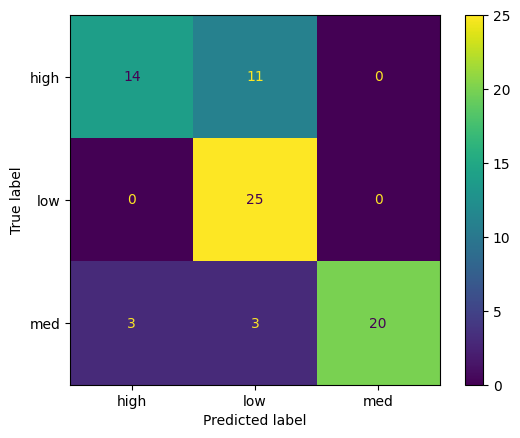

In [ ]:


conf_mat=confusion_matrix(lb.inverse_transform(y_test_flat_category), lb.inverse_transform(flat_category), labels=lb.inverse_transform([0,1,2]))
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = lb.inverse_transform([0,1,2]))

cm_display.plot()
plt.show()

--------------------------------------------------------------------------------Model one end here--------------------------------------------------------------

CNN New Config

In [ ]:
new_model = Sequential()
new_model.add(Conv1D(256, 8, padding='valid',input_shape=(X_train.shape[1],1)))
new_model.add(Activation('relu'))
new_model.add(Conv1D(256, 8, padding='same'))
new_model.add(BatchNormalization())
new_model.add(Activation('relu'))
new_model.add(Dropout(0.25))
new_model.add(MaxPooling1D(pool_size=(8)))
new_model.add(Conv1D(128, 8, padding='same'))
new_model.add(Activation('relu'))
new_model.add(Conv1D(128, 8, padding='same'))
new_model.add(Activation('relu'))
new_model.add(Conv1D(128, 8, padding='same'))
new_model.add(Activation('relu'))
new_model.add(Conv1D(128, 8, padding='same'))
new_model.add(BatchNormalization())
new_model.add(Activation('relu'))
new_model.add(Dropout(0.25))
new_model.add(MaxPooling1D(pool_size=(8)))
new_model.add(Conv1D(64, 8, padding='same'))
new_model.add(Activation('relu'))
new_model.add(Conv1D(64, 8, padding='same'))
new_model.add(Activation('relu'))
new_model.add(Flatten())
# Edit according to target class no.
new_model.add(Dense(3))
new_model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Traing Config1 Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)

mcp_save = ModelCheckpoint('voicd-data-cnn.keras', save_best_only=True, monitor='val_loss', mode='min')

cnnhistory=new_model.fit(x_traincnn, y_train, batch_size=16, epochs=100,validation_data=(x_testcnn, y_test), callbacks=[mcp_save, lr_reduce])

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.3197 - loss: 1.8440 - val_accuracy: 0.3289 - val_loss: 11.2105 - learning_rate: 0.0010
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - accuracy: 0.4387 - loss: 1.0524 - val_accuracy: 0.3289 - val_loss: 8.7820 - learning_rate: 0.0010
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - accuracy: 0.5067 - loss: 1.0253 - val_accuracy: 0.3289 - val_loss: 2.1060 - learning_rate: 0.0010
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.5328 - loss: 0.9631 - val_accuracy: 0.3421 - val_loss: 3.2913 - learning_rate: 0.0010
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - accuracy: 0.6327 - loss: 0.8357 - val_accuracy: 0.3816 - val_loss: 3.0326 - learning_rate: 0.0010
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - accuracy: 0.7304 - loss: 0.6995 - val_accuracy: 0.5395 - val_loss: 1.7022 - learning_rate: 0.0010
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.7864 - loss: 0.6

In [ ]:
y_test_flat_category = y_test.argmax(axis=1).astype(int)

In [ ]:
y_pred = new_model.predict(x_testcnn)
flat_category = np.argmax(y_pred, axis=1).astype(int)


2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step


In [ ]:
print(classification_report(y_test_flat_category, flat_category))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           1       1.00      0.92      0.96        25
           2       0.89      0.92      0.91        26

    accuracy                           0.92        76
   macro avg       0.92      0.92      0.92        76
weighted avg       0.92      0.92      0.92        76



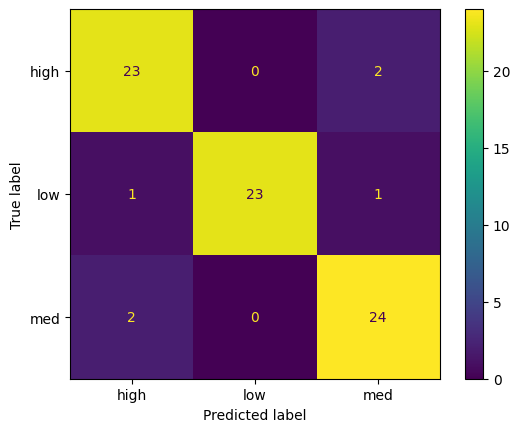

In [ ]:
conf_mat=confusion_matrix(lb.inverse_transform(y_test_flat_category), lb.inverse_transform(flat_category), labels=lb.inverse_transform([0,1,2]))
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = lb.inverse_transform([0,1,2]))

cm_display.plot()
plt.show()

In [ ]:
new_model.save('CNN-new-config.keras')

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialize and train XGBoost
xgb = XGBClassifier()
x_train_reshaped = x_traincnn.reshape(x_traincnn.shape[0], -1)
x_test_reshaped = x_testcnn.reshape(x_testcnn.shape[0], -1)
xgb.fit(x_train_reshaped, y_train.argmax(axis=1))



NameError: name 'y_test_reshaped' is not defined

In [ ]:
# Predict and evaluate
y_pred = xgb.predict(x_test_reshaped)
print(classification_report(y_test.argmax(axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        25
           1       0.96      0.96      0.96        25
           2       0.90      0.73      0.81        26

    accuracy                           0.87        76
   macro avg       0.88      0.87      0.87        76
weighted avg       0.88      0.87      0.87        76



In [ ]:
y_test_flat_category = y_test.argmax(axis=1).astype(int)

In [ ]:
flat_category = y_pred.astype(int)


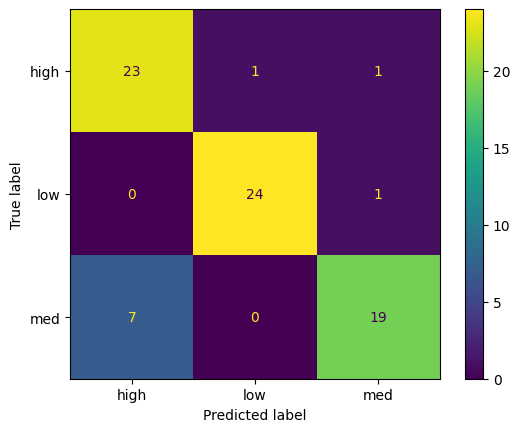

In [ ]:
conf_mat=confusion_matrix(lb.inverse_transform(y_test_flat_category), lb.inverse_transform(flat_category), labels=lb.inverse_transform([0,1,2]))
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = lb.inverse_transform([0,1,2]))

cm_display.plot()
plt.show()

In [ ]:
xgb.save_model('xgb-model.keras')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:25:20] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [ ]:
input_shape = (10293, 1)
output_classes = 3

In [ ]:
ANNmodel = Sequential([
    Flatten(input_shape=input_shape),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(output_classes, activation='softmax')
])


In [ ]:
ANNmodel.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.summary()



In [ ]:
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)

mcp_save = ModelCheckpoint('voicd-data-cnn.keras', save_best_only=True, monitor='val_loss', mode='min')

cnnhistory=ANNmodel.fit(x_traincnn, y_train, batch_size=16, epochs=100,validation_data=(x_testcnn, y_test), callbacks=[mcp_save, lr_reduce])

In [ ]:
y_test_flat_category = y_test.argmax(axis=1).astype(int)
y_pred = ANNmodel.predict(x_testcnn)
flat_category = np.argmax(y_pred, axis=1).astype(int)

In [ ]:
conf_mat=confusion_matrix(lb.inverse_transform(y_test_flat_category), lb.inverse_transform(flat_category), labels=lb.inverse_transform([0,1,2]))
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = lb.inverse_transform([0,1,2]))

cm_display.plot()
plt.show()